In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from multihist import Hist1d, Histdd
import os
import straxen
from cutax.cut_lists import rn220
from cutax import cut_efficiency

plt.style.use("xenonnt")

In [7]:
straxen.print_versions(print_output=True)

Host midway2-0417.rcc.local
 module version                                                                             path  git
 python  3.8.12                          /opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/bin/python None
  strax   1.2.0   /opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/strax None
straxen   1.6.0 /opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/straxen None
  cutax   1.6.0                                /dali/lgrandi/xenonnt/software/cutax/latest/cutax None


,module,version,path,git
0,python,3.8.12,/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/b...,None
1,strax,1.2.0,/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/l...,None
2,straxen,1.6.0,/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/l...,None
3,cutax,1.6.0,/dali/lgrandi/xenonnt/software/cutax/latest/cutax,None


In [3]:
# v7
path = "/project2/lgrandi/jingqiang/xenonnt_sr0/calibration/rn220"
final_file = "nt_sr0_rn220_runs_cmtv7_tag20220305.hdf"


df = pd.read_hdf(os.path.join(path, final_file), "table")

In [4]:
# check how many cuts are applied

for c in df.columns.values:
    if "cut" in c:
        print(c)

cut_cs2_area_fraction_top
cut_daq_veto
cut_fiducial_volume
cut_interaction_exists
cut_main_is_valid_triggering_peak
cut_pres2_junk
cut_rn220_s2_area
cut_run_boundaries
cut_s1_area_fraction_top
cut_s1_max_pmt
cut_s1_pattern_bottom
cut_s1_pattern_top
cut_s1_single_scatter
cut_s1_tightcoin_3fold
cut_s1_width
cut_s2_pattern
cut_s2_recon_pos_diff
cut_s2_single_scatter
cut_s2_width
cuts_rn220


In [8]:
for cut in rn220.Rn220Selection.cuts:
    print(cut.provides)

cut_daq_veto
cut_interaction_exists
cut_run_boundaries
cut_main_is_valid_triggering_peak
('cut_s1_tightcoin_3fold',)
('cut_s1_max_pmt',)
cut_s1_single_scatter
cut_s1_width
('cut_cs2_area_fraction_top',)
('cut_s2_recon_pos_diff',)
cut_s2_pattern
('cut_s2_single_scatter',)
('cut_s2_width',)
cut_s1_area_fraction_top
cut_s1_pattern_top
cut_s1_pattern_bottom
('cut_fiducial_volume',)
cut_pres2_junk
('cut_rn220_s2_area',)


In [9]:
# check survival in a cumulative way
fraction_cumu = 1

cut_name_s = []
fraction_s = []
fraction_cumu_s = []
n_pre_s = []
n_after_s = []

for cut in rn220.Rn220Selection.cuts:
    n_pre = len(df)
    # apply the cut
    cut_name = cut.provides
    if isinstance(cut_name, tuple):
        cut_name = cut_name[0]
        
    df = df[df[cut_name]]
    n_after = len(df)
    
    # individual fraction
    fraction = n_after / n_pre
    # cumulative
    fraction_cumu *= fraction
    
    # append everything
    cut_name_s.append(cut_name)
    fraction_s.append(fraction)
    fraction_cumu_s.append(fraction_cumu)
    n_pre_s.append(n_pre)
    n_after_s.append(n_after)


In [10]:
df_fraction = pd.DataFrame(dict(
    cut = cut_name_s,
    n_pre = n_pre_s,
    n_after = n_after_s,
    fraction = fraction_s,
    cumulative_fraction = fraction_cumu_s,
))

In [21]:
straxen.dataframe_to_wiki(df_fraction)

'^ Awesome table ^^^^^\n^ cut ^ n_pre ^ n_after ^ fraction ^ cumulative_fraction ^\n| cut_daq_veto | 563447 | 476042 | 0.84487 | 0.84487 |\n| cut_interaction_exists | 476042 | 476042 | 1.0 | 0.84487 |\n| cut_run_boundaries | 476042 | 475750 | 0.99939 | 0.84436 |\n| cut_main_is_valid_triggering_peak | 475750 | 475581 | 0.99964 | 0.84406 |\n| cut_s1_tightcoin_3fold | 475581 | 111797 | 0.23507 | 0.19842 |\n| cut_s1_max_pmt | 111797 | 93676 | 0.83791 | 0.16626 |\n| cut_s1_single_scatter | 93676 | 89807 | 0.9587 | 0.15939 |\n| cut_s1_width | 89807 | 74595 | 0.83061 | 0.13239 |\n| cut_cs2_area_fraction_top | 74595 | 51923 | 0.69607 | 0.09215 |\n| cut_s2_recon_pos_diff | 51923 | 51565 | 0.99311 | 0.09152 |\n| cut_s2_pattern | 51565 | 50837 | 0.98588 | 0.09022 |\n| cut_s2_single_scatter | 50837 | 42115 | 0.82843 | 0.07475 |\n| cut_s2_width | 42115 | 39778 | 0.94451 | 0.0706 |\n| cut_s1_area_fraction_top | 39778 | 38478 | 0.96732 | 0.06829 |\n| cut_s1_pattern_top | 38478 | 38198 | 0.99272 | 0.0

In [13]:
print(straxen.dataframe_to_wiki(df_fraction))

^ Awesome table ^^^^^
^ cut ^ n_pre ^ n_after ^ fraction ^ cumulative_fraction ^
| cut_daq_veto | 563447 | 476042 | 0.84487 | 0.84487 |
| cut_interaction_exists | 476042 | 476042 | 1.0 | 0.84487 |
| cut_run_boundaries | 476042 | 475750 | 0.99939 | 0.84436 |
| cut_main_is_valid_triggering_peak | 475750 | 475581 | 0.99964 | 0.84406 |
| cut_s1_tightcoin_3fold | 475581 | 111797 | 0.23507 | 0.19842 |
| cut_s1_max_pmt | 111797 | 93676 | 0.83791 | 0.16626 |
| cut_s1_single_scatter | 93676 | 89807 | 0.9587 | 0.15939 |
| cut_s1_width | 89807 | 74595 | 0.83061 | 0.13239 |
| cut_cs2_area_fraction_top | 74595 | 51923 | 0.69607 | 0.09215 |
| cut_s2_recon_pos_diff | 51923 | 51565 | 0.99311 | 0.09152 |
| cut_s2_pattern | 51565 | 50837 | 0.98588 | 0.09022 |
| cut_s2_single_scatter | 50837 | 42115 | 0.82843 | 0.07475 |
| cut_s2_width | 42115 | 39778 | 0.94451 | 0.0706 |
| cut_s1_area_fraction_top | 39778 | 38478 | 0.96732 | 0.06829 |
| cut_s1_pattern_top | 38478 | 38198 | 0.99272 | 0.06779 |
| cut_s1_p

In [16]:
# g1g2
# from henning's note
# https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:xenonnt:analysis:ntsciencerun0:g1g2
def ces(cs1, cs2):
    g1 = 0.1557
    g2 = 17.83
    w = 0.0137
    return (cs1/g1 + cs2/g2) * w

# from Evan's note
# https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:shockley:xenonnt:ar37:supermegafit
def ces_supermega(cs1, cs2):
    g1 = 0.1553
    g2 = 16.44
    w = 0.0137
    return (cs1/g1 + cs2/g2) * w

# blinding
# https://github.com/XENONnT/private_nt_aux_files/blob/9f50bedaf3324bd07da158e61673f6d676876c8c/strax_files/pre_apply_function.py#L72-L74
# g1 = 0.17
# g2 = 16
# W = 13.6e-3
def ces_blind(cs1, cs2):
    g1 = 0.17
    g2 = 16
    w = 13.6e-3
    return (cs1/g1 + cs2/g2) * w

def rotated_x(x, y):
    """get rotated x, i.e. perpendicular to the transverse wires"""
    angle = np.pi / 6
    rotated_x = x*np.cos(angle) - y*np.sin(angle)
    return rotated_x

def rotated_y(x, y):
    """get rotated x, i.e. perpendicular to the transverse wires"""
    angle = np.pi / 6
    rotated_x = x*np.sin(angle) + y*np.cos(angle)
    return rotated_x

(<matplotlib.collections.QuadMesh at 0x7fdc9850d0d0>,
 <matplotlib.colorbar.Colorbar at 0x7fdc98fc8220>)

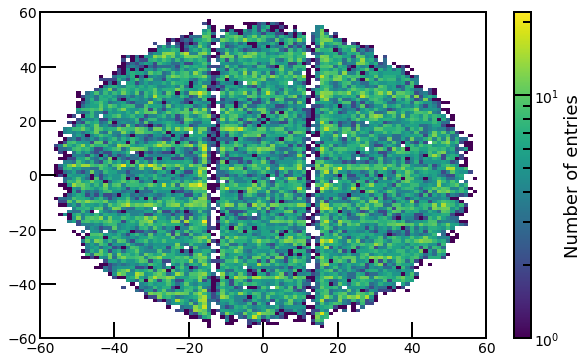

In [48]:
df["s2_x_rotated"] = rotated_x(df["s2_x"], df["s2_y"])
df["s2_y_rotated"] = rotated_y(df["s2_x"], df["s2_y"])

mh = Histdd(df["s2_x_rotated"], df["s2_y_rotated"], bins=(np.linspace(-60, 60, 100), np.linspace(-60, 60, 100)))
mh.plot(log_scale=True)

In [47]:
def get_lower_upper_bound(h_n, h_n_1, method="cp"):
    """
    get lower and upper uncertainty as a hist1d object.
    h_n_1: after N-1 cuts
    h_n: after all the cuts
    """
    h_lower_bound = h_n.similar_blank_histogram()
    h_upper_bound = h_n.similar_blank_histogram()
    
    upper_bound_s = []
    lower_bound_s = []
    for k, n in zip(h_n.histogram, h_n_1.histogram):
        if method == "cp":
            lower, upper = cut_efficiency.compute_acceptance_uncertainty_CP(k, n)
        elif method == "bayesian":
            lower, upper = cut_efficiency.compute_acceptance_uncertainty_bayesian(k, n)
        else:
            raise ValueError(f"{method} can only be 'cp' or 'beyesian'!")
            
        avg = k / n
        lower_bound_s.append(avg - lower)
        upper_bound_s.append(upper - avg)
        
    h_lower_bound.histogram = np.array(lower_bound_s)
    h_upper_bound.histogram = np.array(upper_bound_s)
    
    return h_lower_bound, h_upper_bound


def get_acceptance(cut_name, param_name, bin_config, unc_method="cp"):
    df = pd.read_hdf(os.path.join(path, final_file), "table")
    # add extra quantities
    df["ces"] = ces_supermega(df["cs1"], df["cs2"])
    df["r2"] = df["r"]**2
    df["s2_x_rotated"] = rotated_x(df["s2_x"], df["s2_y"])
    
    # N-1
    for cut in df_fraction.cut.values:
        if cut == cut_name:
            continue

        df = df[df[cut]]

    # n-1    
    h_n_1 = Hist1d(df[param_name], **bin_config)
    # n
    df = df[df[cut_name]]
    h_n = Hist1d(df[param_name], **bin_config)
    
    h_acc_lower, h_acc_upper = get_lower_upper_bound(h_n, h_n_1, unc_method)
    h_acc = h_n / h_n_1
    
    ret = dict(
        cut_name = cut_name,
        param_name = param_name,
        unc_method = unc_method,
        acceptance = dict(avg=h_acc, lower_unc=h_acc_lower, upper_unc=h_acc_upper)
    )
    
    return ret


def plot_acc(ret):
    h_acc = ret["acceptance"]["avg"]
    h_acc_lower = ret["acceptance"]["lower_unc"]
    h_acc_upper = ret["acceptance"]["upper_unc"]
    
    plt.errorbar(h_acc.bin_centers, h_acc.histogram, 
             yerr=(h_acc_lower.histogram, 
                   h_acc_upper.histogram),
             fmt="s", ms=3, capsize=5,
             )
    plt.xlabel(ret["param_name"])
    plt.ylabel(f"N-1 acceptance ({ret['unc_method']})")
    plt.title(ret["cut_name"])
    
    
def to_wiki_figure(param_name, cuts=cuts, figsize=400, wiki_address=":xenon:xenonnt:sr0:rn220:"):
    """
    Get the nice string for showing figures in xenon wiki
    """
    s_string = "<figure label>\n"
    end_string = "\n<caption>caption</caption>\n</figure>"

    for cut in cuts:
        filename = f"{cut}_acc_{param_name}"
        _s_string = "{" + f"{{{wiki_address}{filename}.png?{figsize}|}}" + "}"
        s_string += _s_string

    s_string += end_string
    return s_string

In [15]:
# quality cuts for check
cuts = [
    "cut_s1_max_pmt", "cut_s1_single_scatter", "cut_s1_width",
    "cut_cs2_area_fraction_top", "cut_s2_pattern", "cut_s2_single_scatter", "cut_s2_recon_pos_diff",
    "cut_s2_width", "cut_s1_area_fraction_top", "cut_s1_pattern_bottom", "cut_s1_pattern_top",
]

s1_cuts = ["cut_s1_max_pmt", "cut_s1_single_scatter", "cut_s1_width"]
s2_cuts = ["cut_cs2_area_fraction_top", "cut_s2_single_scatter", "cut_s2_pattern", "cut_s2_recon_pos_diff"]
pairing_cuts_s1 = ["cut_s1_area_fraction_top", "cut_s1_pattern_bottom", "cut_s1_pattern_top"]
pairing_cuts_s2 = ["cut_s2_width"]

## CES

In [20]:
!pwd

/home/tzpmb0714/analysis/xenonnt_sr0/calibration/rn220/cut_acceptance


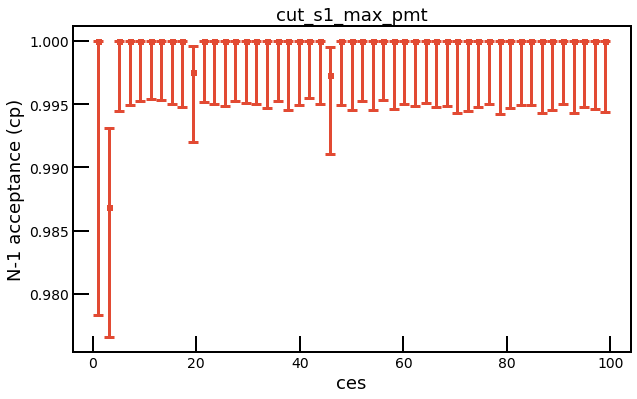

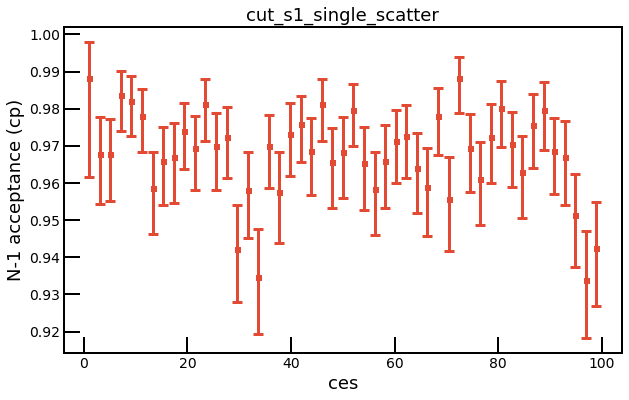

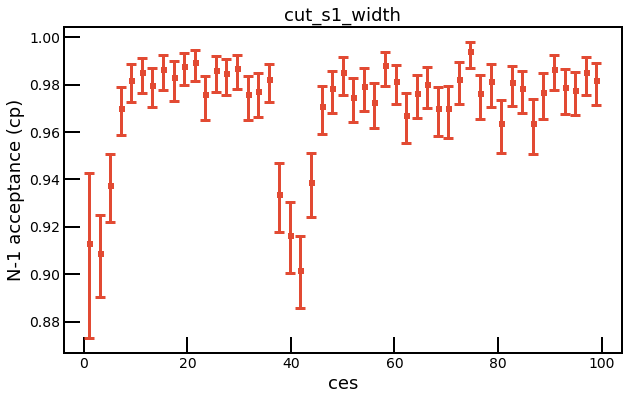

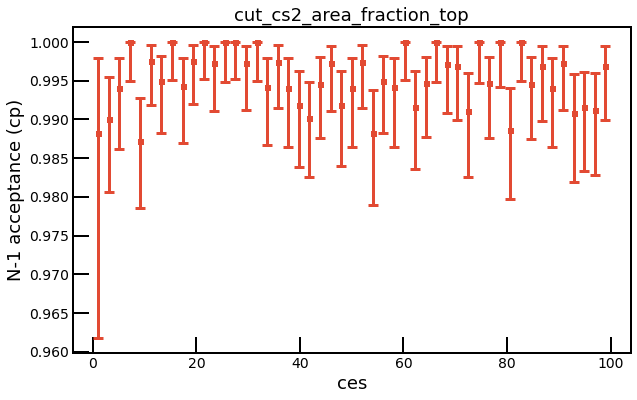

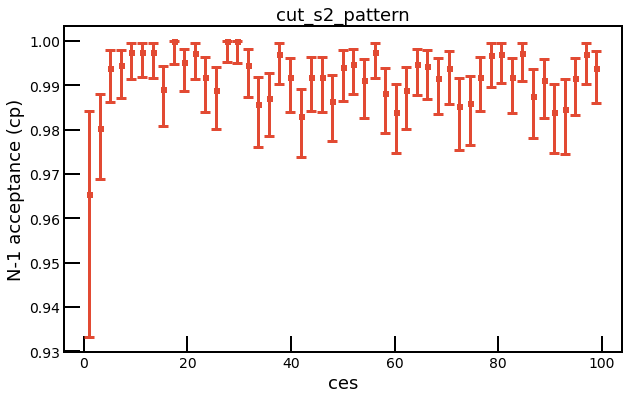

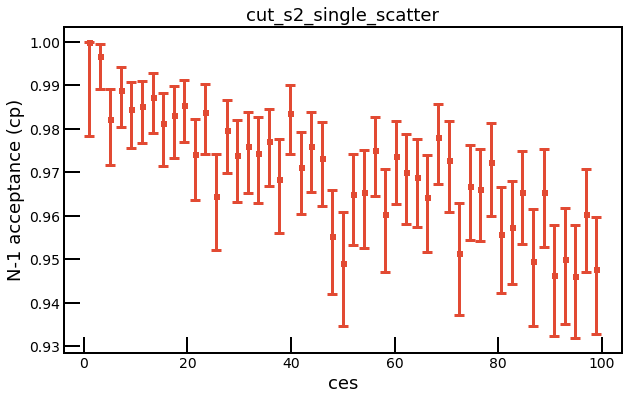

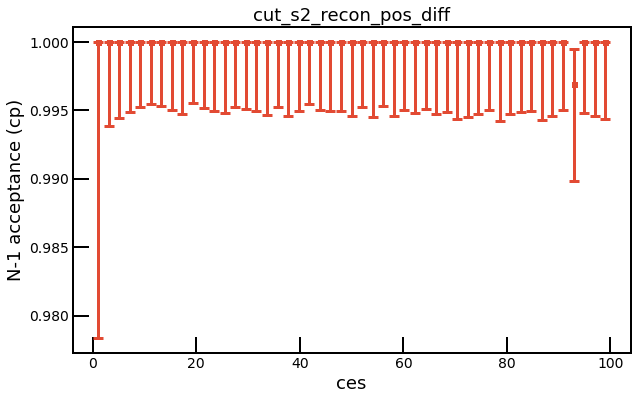

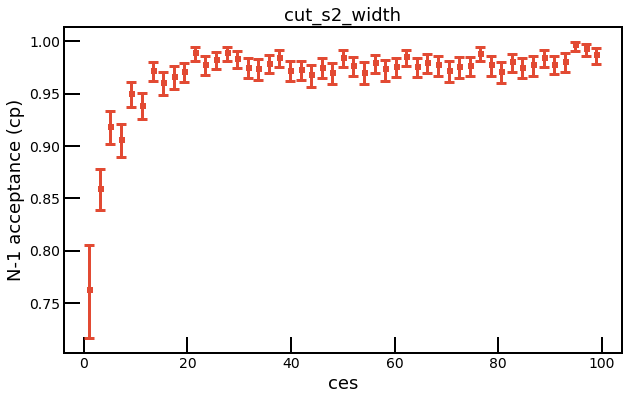

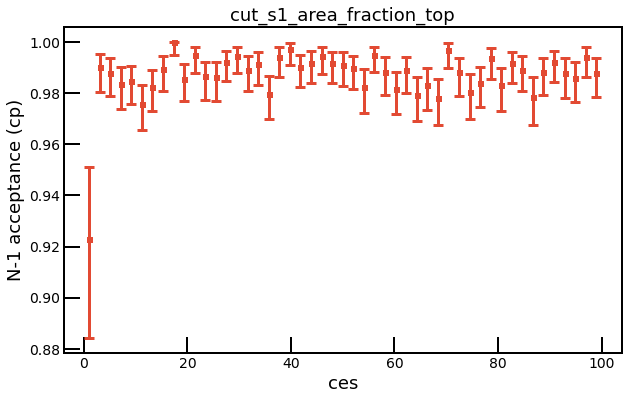

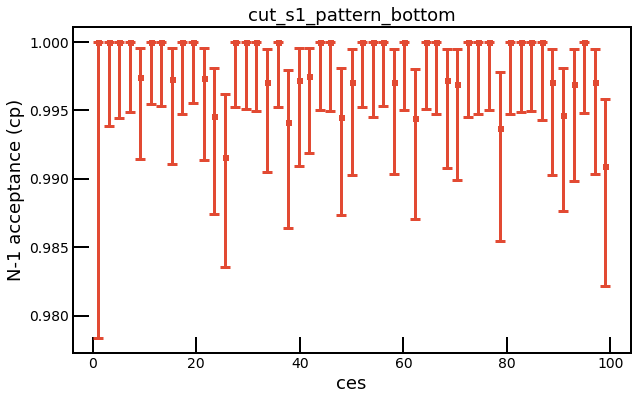

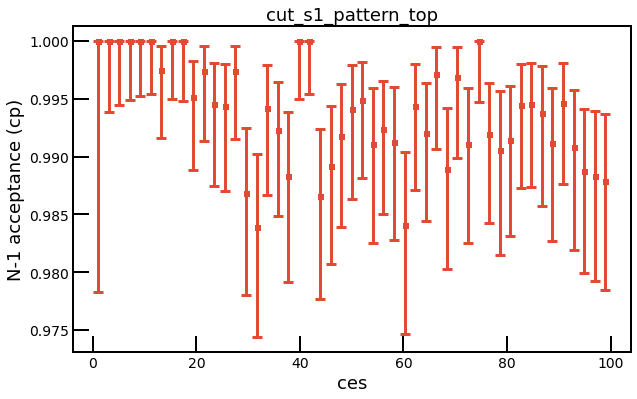

In [19]:
# ces
savefig = True
param_name = "ces"

for cut in cuts:
    ret = get_acceptance(cut_name=cut, param_name=param_name, 
                         bin_config=dict(bins=np.linspace(0, 100, 50)),
                         unc_method="cp")
    plot_acc(ret)
    
    if savefig:
        filename = f"{cut}_acc_{param_name}"
        plt.savefig(f"fig/png/{filename}.png")
    plt.show()

In [46]:
print(to_wiki_figure("ces"))

<figure label>
{{:xenon:xenonnt:sr0:rn220:cut_s1_max_pmt_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_single_scatter_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_width_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_cs2_area_fraction_top_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_pattern_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_single_scatter_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_recon_pos_diff_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_width_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_area_fraction_top_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_pattern_bottom_acc_ces.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_pattern_top_acc_ces.png?400|}}
<caption>caption</caption>
</figure>


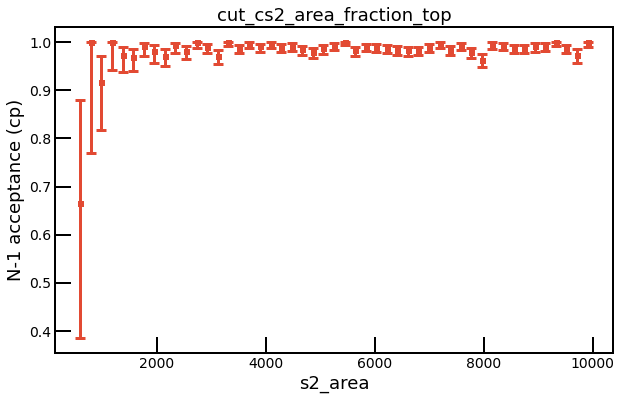

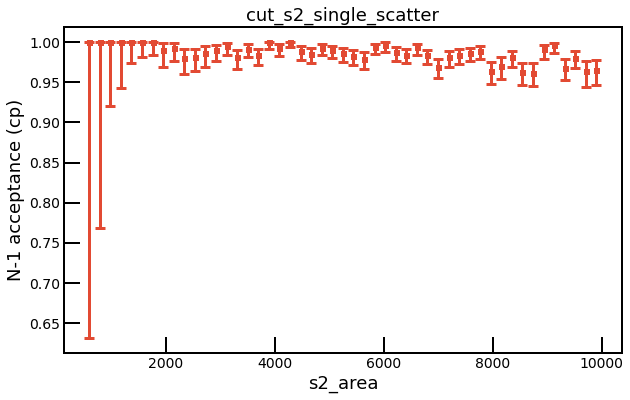

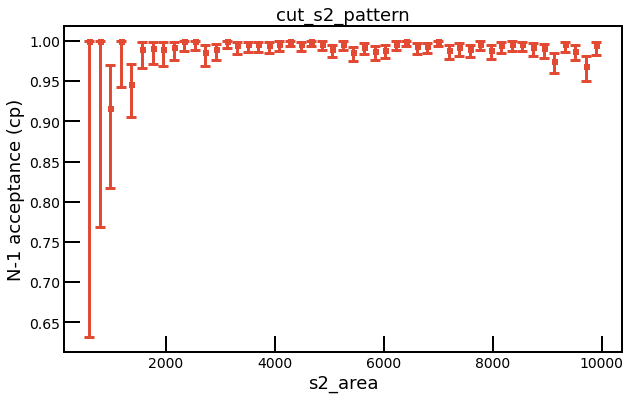

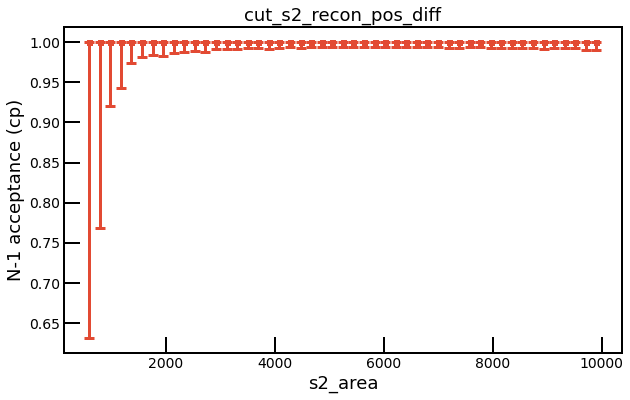

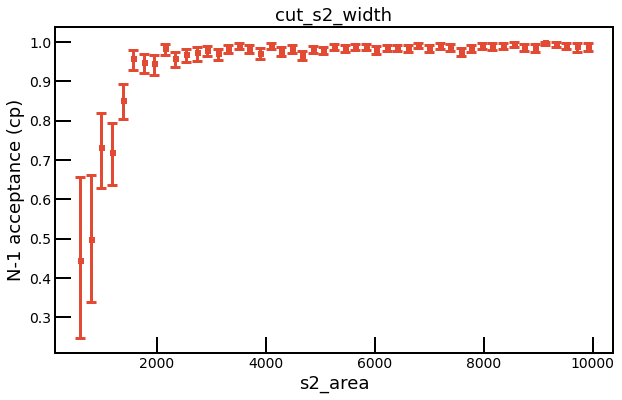

In [20]:
# s2

for cut in s2_cuts + pairing_cuts_s2:
    ret = get_acceptance(cut_name=cut, param_name="s2_area", 
                         bin_config=dict(bins=np.linspace(500, 1e4, 50)),
                         unc_method="cp")
    plot_acc(ret)
    
    
    plt.show()

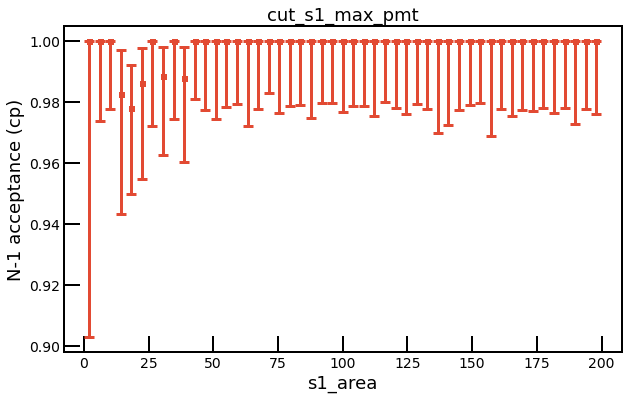

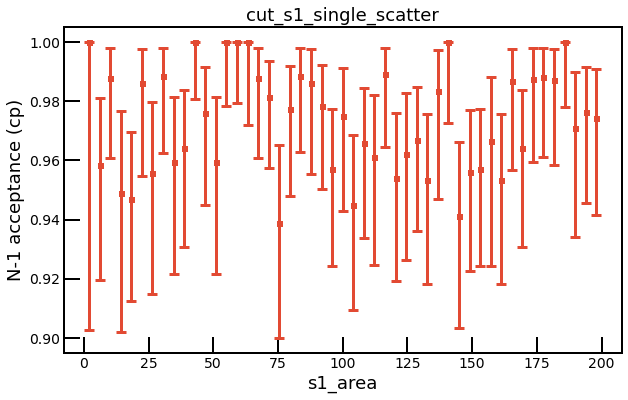

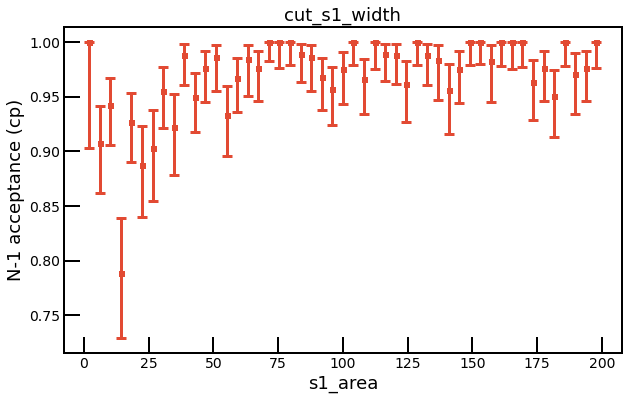

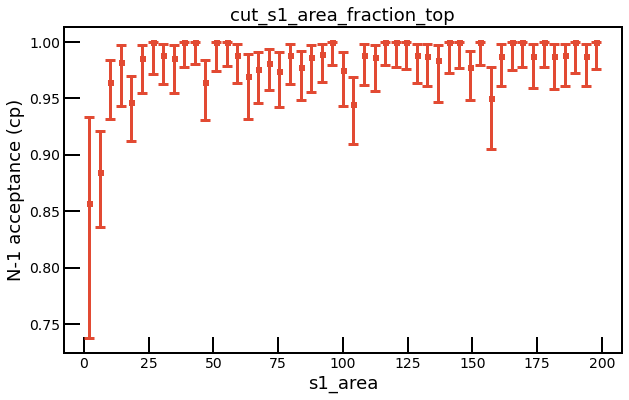

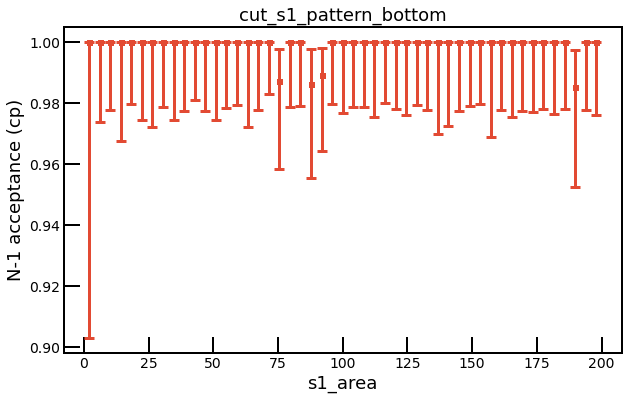

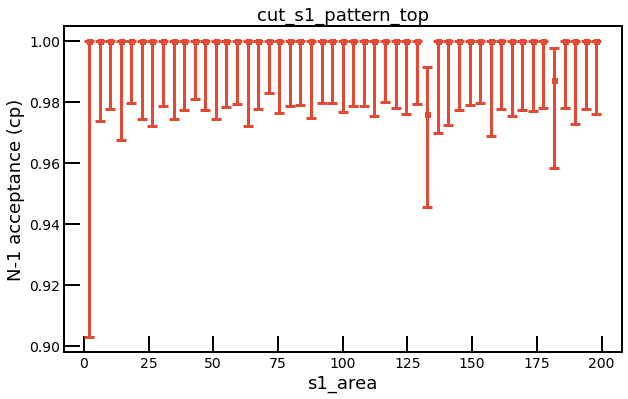

In [19]:
# s1
for cut in s1_cuts + pairing_cuts_s1:
    ret = get_acceptance(cut_name=cut, param_name="s1_area", 
                         bin_config=dict(bins=np.linspace(0, 200, 50)),
                         unc_method="cp")
    plot_acc(ret)
    plt.show()

## Space

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


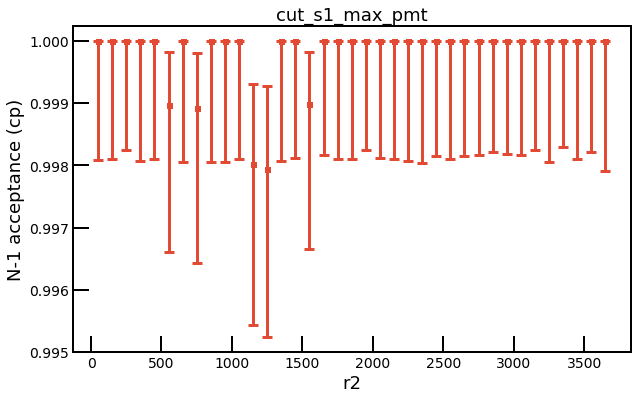

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


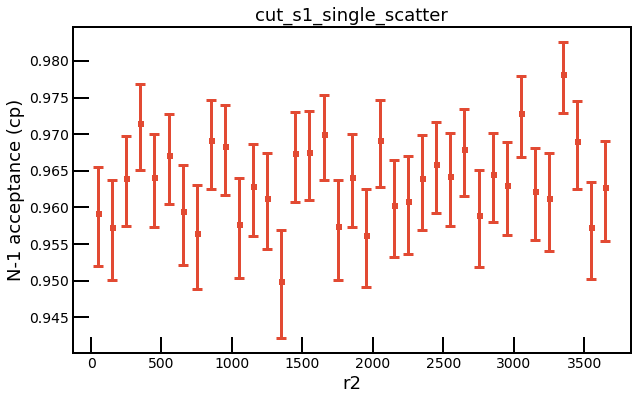

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


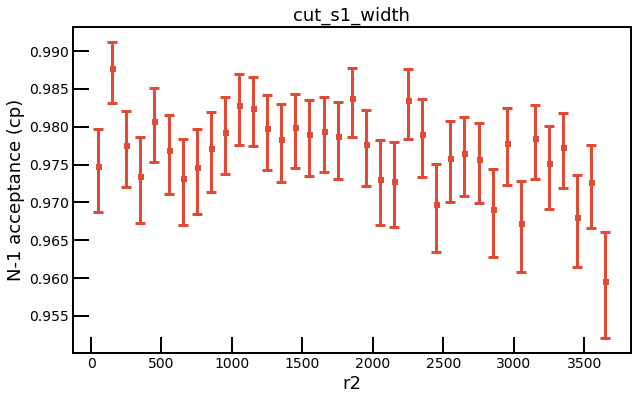

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


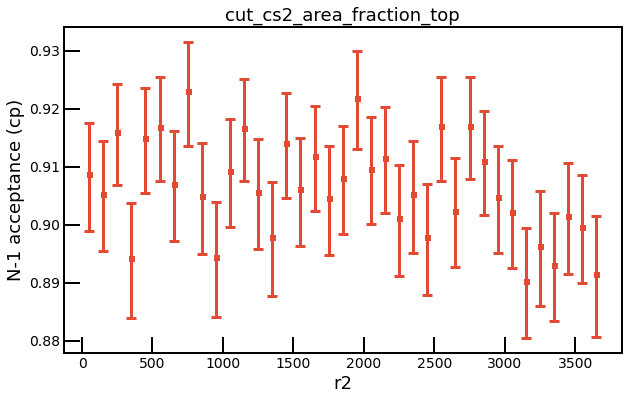

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


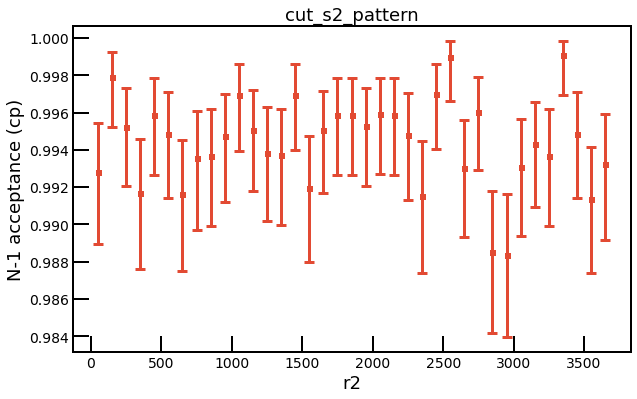

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


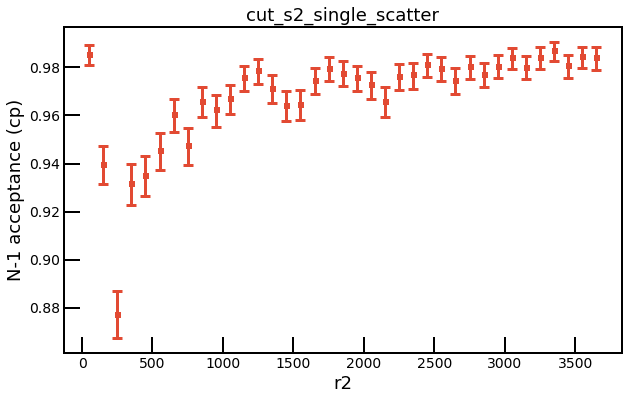

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


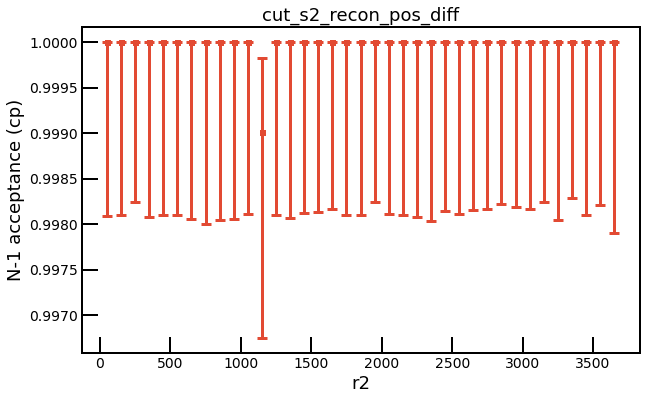

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


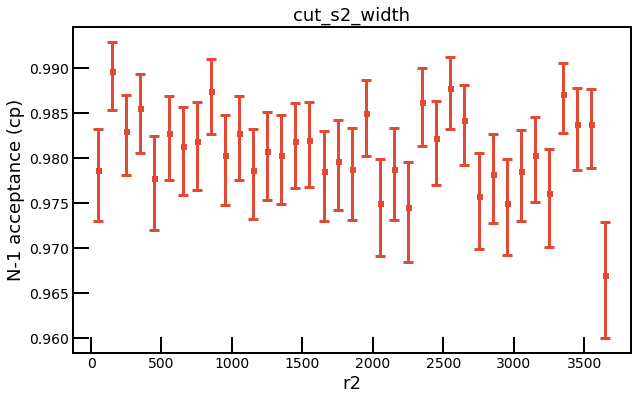

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


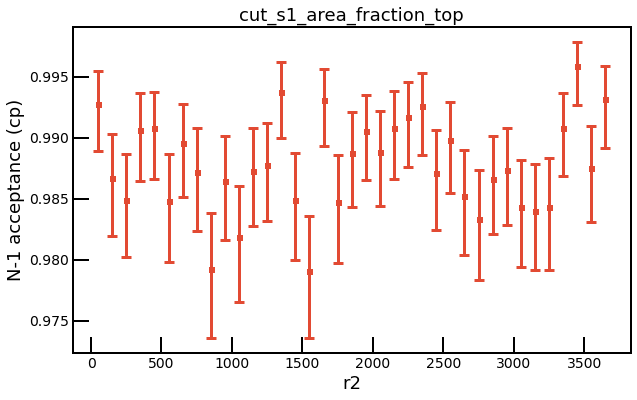

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


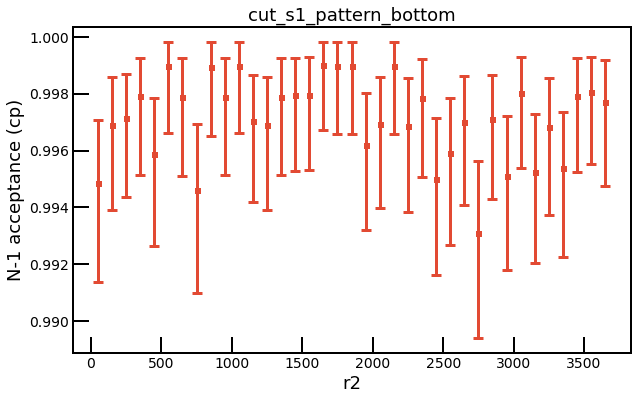

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


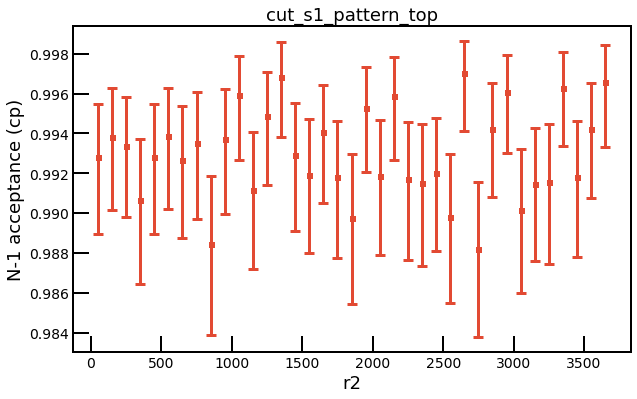

In [48]:
# R
savefig = True
param_name = "r2"

for cut in cuts:
    ret = get_acceptance(cut_name=cut, param_name=param_name, 
                         bin_config=dict(bins=np.linspace(0, 70**2, 50)),
                         unc_method="cp")
    plot_acc(ret)
    if savefig:
        filename = f"{cut}_acc_{param_name}"
        plt.savefig(f"fig/png/{filename}.png")
    plt.show()

In [49]:
print(to_wiki_figure("r2"))

<figure label>
{{:xenon:xenonnt:sr0:rn220:cut_s1_max_pmt_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_single_scatter_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_width_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_cs2_area_fraction_top_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_pattern_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_single_scatter_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_recon_pos_diff_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_width_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_area_fraction_top_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_pattern_bottom_acc_r2.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_pattern_top_acc_r2.png?400|}}
<caption>caption</caption>
</figure>


/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


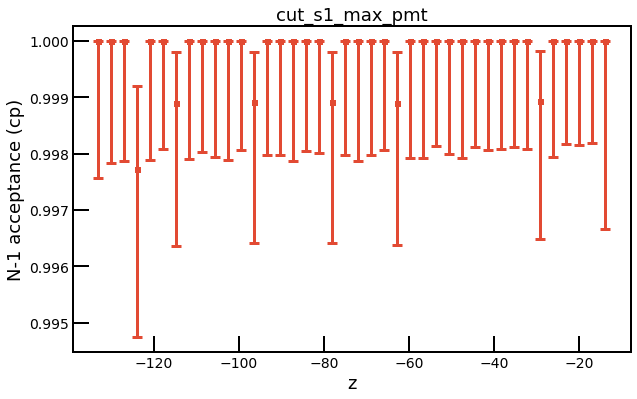

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


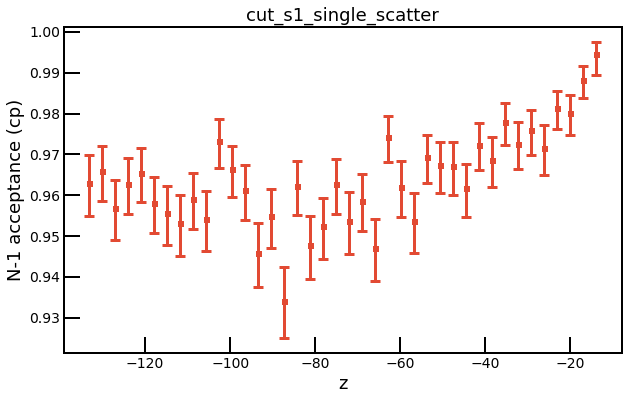

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


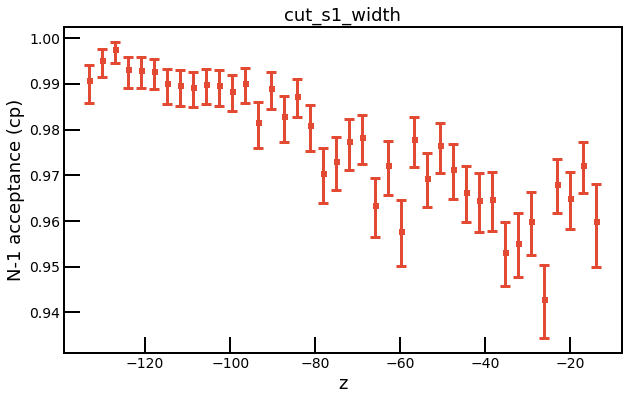

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


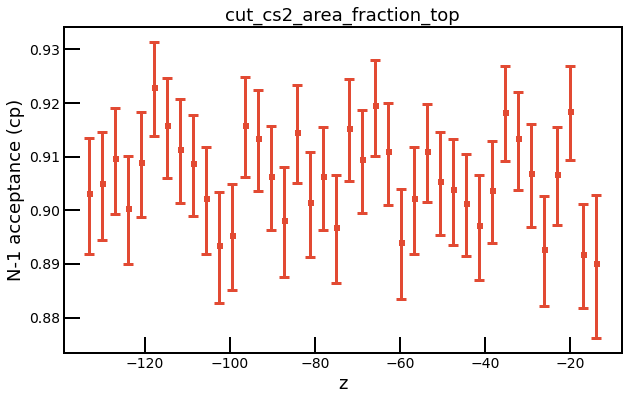

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


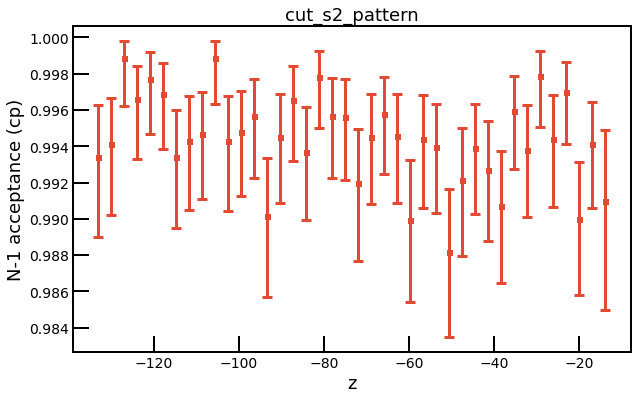

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


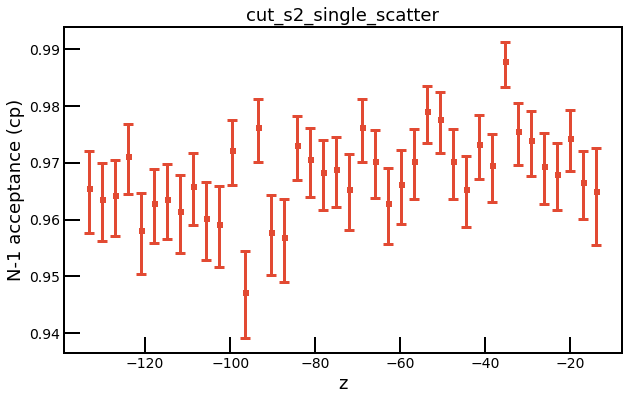

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


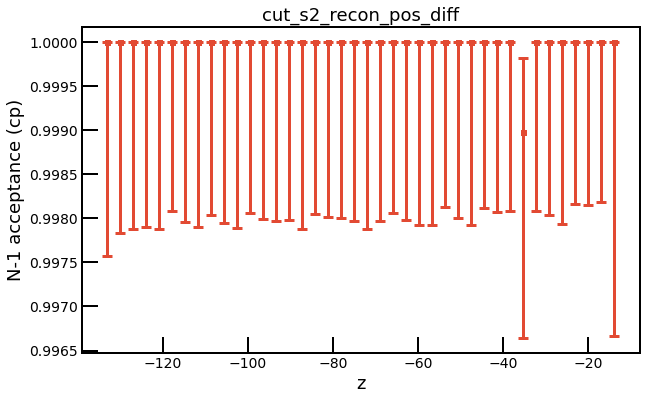

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


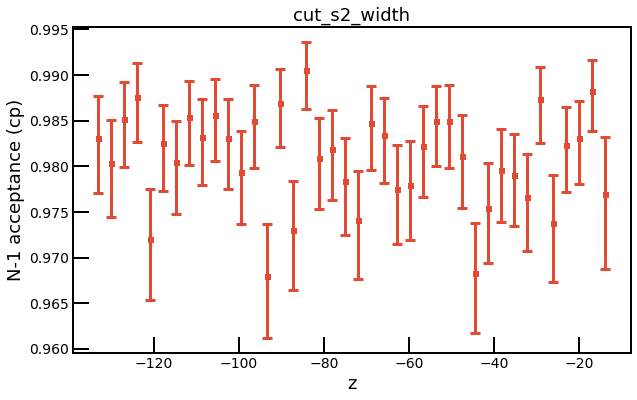

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


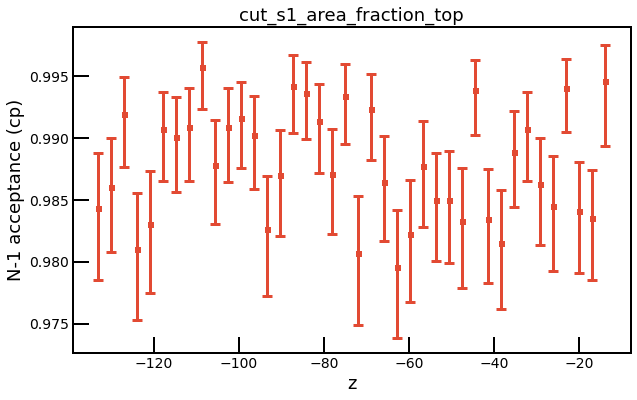

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


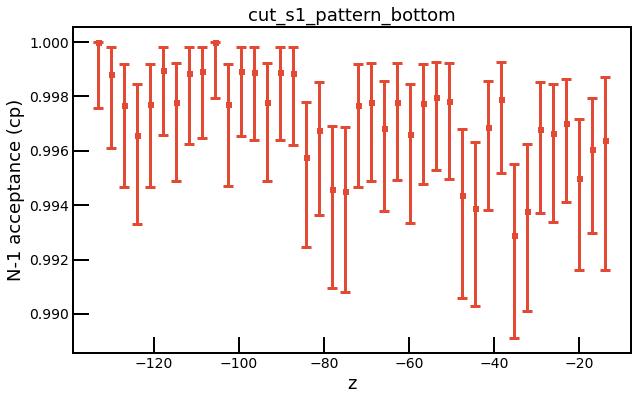

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


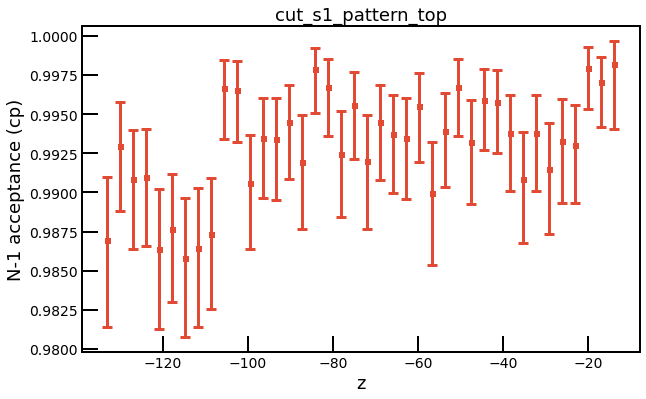

In [50]:
# z
savefig = True
param_name = "z"

for cut in cuts:
    ret = get_acceptance(cut_name=cut, param_name=param_name, 
                         bin_config=dict(bins=np.linspace(-150, 0, 50)),
                         unc_method="cp")
    plot_acc(ret)
    if savefig:
        filename = f"{cut}_acc_{param_name}"
        plt.savefig(f"fig/png/{filename}.png")
    plt.show()

In [51]:
print(to_wiki_figure("z"))

<figure label>
{{:xenon:xenonnt:sr0:rn220:cut_s1_max_pmt_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_single_scatter_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_width_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_cs2_area_fraction_top_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_pattern_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_single_scatter_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_recon_pos_diff_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_width_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_area_fraction_top_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_pattern_bottom_acc_z.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_pattern_top_acc_z.png?400|}}
<caption>caption</caption>
</figure>


/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


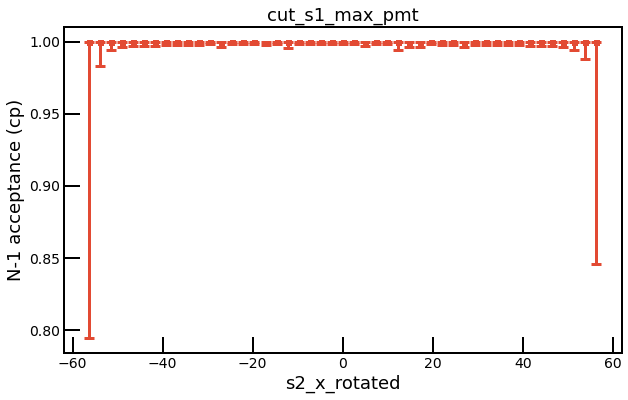

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


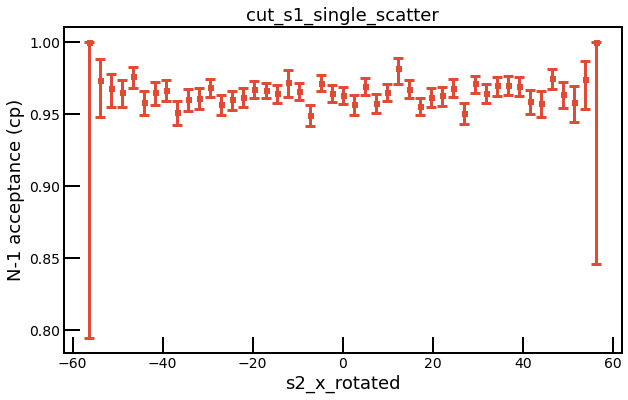

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


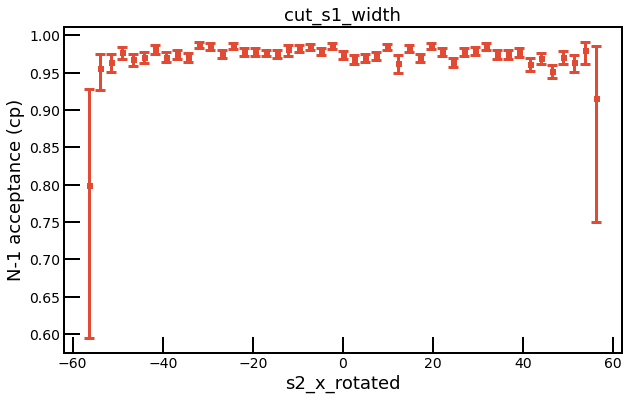

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


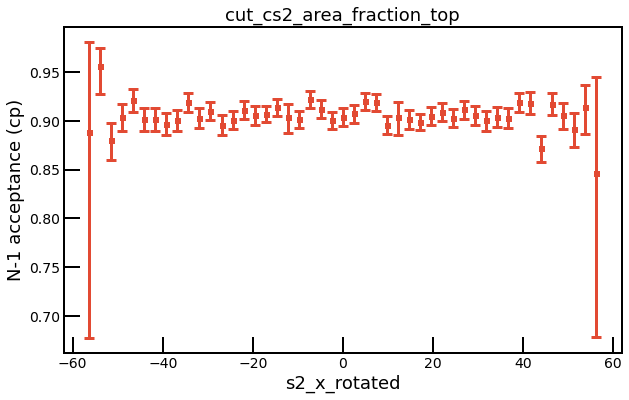

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


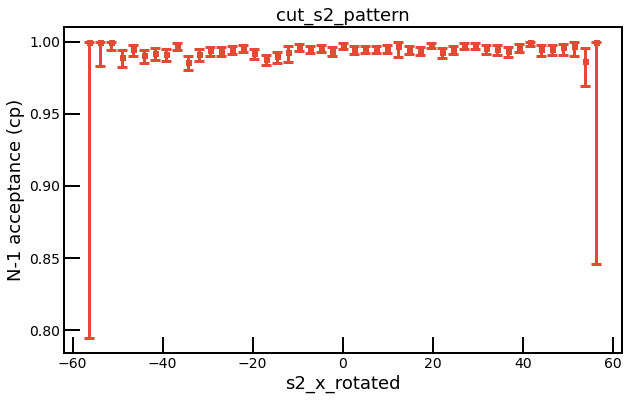

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


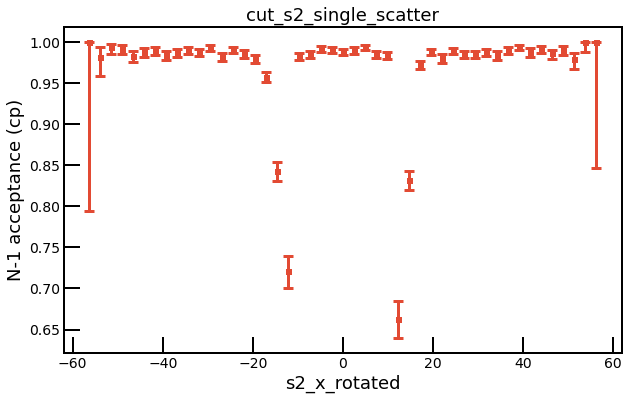

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


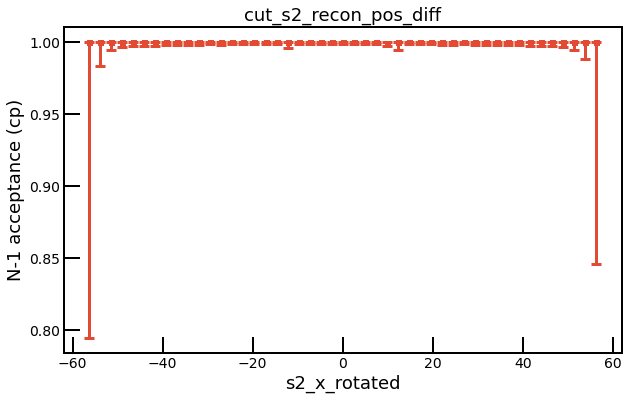

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


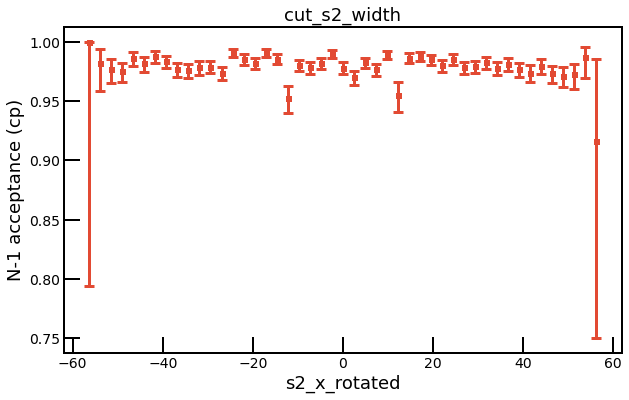

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


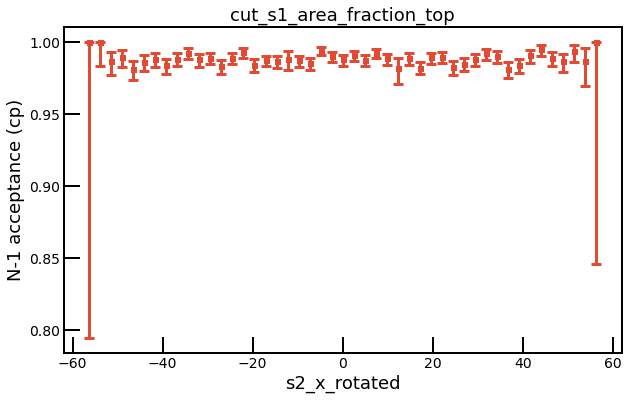

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


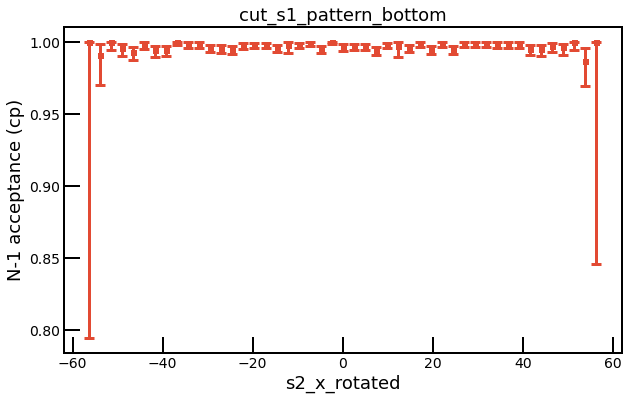

/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/tmp/jobs/18778670/ipykernel_103/2471884349.py:20: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/opt/XENONnT/anaconda/envs/XENONnT_2022.03.5/lib/python3.8/site-packages/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


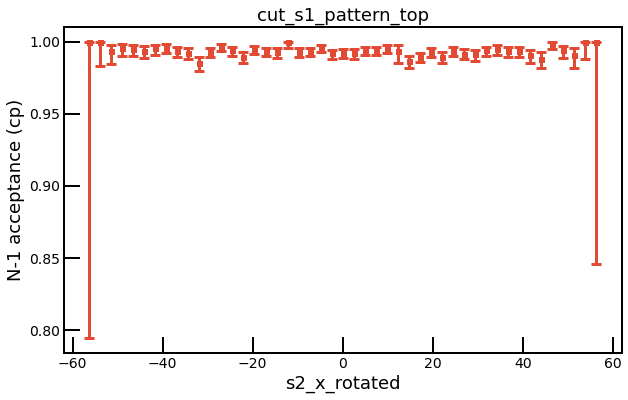

In [52]:
# s2_x_rotated
savefig = True
param_name = "s2_x_rotated"

for cut in cuts:
    ret = get_acceptance(cut_name=cut, param_name=param_name, 
                         bin_config=dict(bins=np.linspace(-60, 60, 50)),
                         unc_method="cp")
    plot_acc(ret)
    if savefig:
        filename = f"{cut}_acc_{param_name}"
        plt.savefig(f"fig/png/{filename}.png")
    plt.show()

In [53]:
print(to_wiki_figure("s2_x_rotated"))

<figure label>
{{:xenon:xenonnt:sr0:rn220:cut_s1_max_pmt_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_single_scatter_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_width_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_cs2_area_fraction_top_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_pattern_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_single_scatter_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_recon_pos_diff_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s2_width_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_area_fraction_top_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_pattern_bottom_acc_s2_x_rotated.png?400|}}{{:xenon:xenonnt:sr0:rn220:cut_s1_pattern_top_acc_s2_x_rotated.png?400|}}
<caption>caption</caption>
</figure>
